In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
frame = cv2.imread("./data/priority.jpg", cv2.IMREAD_COLOR)
print(frame.shape)

(480, 640, 3)


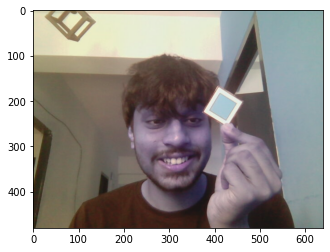

In [42]:
plt.imshow(frame)

In [22]:
f2 = frame[1400:1500, 1500:1700]
cv2.cvtColor(f2, cv2.COLOR_BGR2HSV)

array([[[  1, 191, 216],
        [  1, 191, 216],
        [  1, 191, 216],
        ...,
        [  1, 193, 213],
        [  1, 193, 213],
        [  1, 193, 213]],

       [[  1, 191, 216],
        [  1, 191, 216],
        [  1, 191, 216],
        ...,
        [  1, 193, 213],
        [  1, 193, 213],
        [  1, 193, 213]],

       [[  1, 191, 216],
        [  1, 191, 216],
        [  1, 191, 216],
        ...,
        [  1, 193, 213],
        [  1, 193, 213],
        [  1, 193, 213]],

       ...,

       [[  1, 189, 218],
        [  1, 189, 218],
        [  1, 190, 217],
        ...,
        [  3, 151, 179],
        [  3, 134, 184],
        [  4, 111, 196]],

       [[  1, 189, 218],
        [  1, 189, 218],
        [  1, 190, 217],
        ...,
        [  3, 128, 181],
        [  3, 108, 194],
        [  5,  86, 211]],

       [[  1, 189, 218],
        [  1, 189, 218],
        [  1, 190, 217],
        ...,
        [  5, 105, 189],
        [  5,  86, 207],
        [  6,  69, 223]]

In [23]:
hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
red1 = np.array([1, 50, 50])
red2 = np.array([20, 255, 255])

mask = cv2.inRange(hsv_img, red1, red2)
    

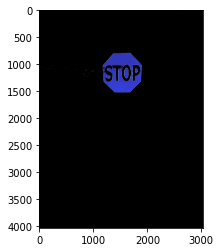

In [30]:
imgRes = cv2.bitwise_and(frame, frame, mask=mask)

plt.imshow(imgRes)

In [38]:
gray = cv2.cvtColor(imgRes, cv2.COLOR_BGR2GRAY)
    
contours, hierarchy = cv2.findContours(
        gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )
imgContour = frame.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.05 * peri, True)
    text = "stop"
    cv2.drawContours(imgContour, [approx], -1, (255, 0, 255), 7)
    # print(len(approx))
    x_, y_, w, h = cv2.boundingRect(approx)
    box = [(x_, y_), (x_ + w, y_ + h)]
    location = (x_, y_)
    cv2.rectangle(imgContour, (x_, y_), (x_ + w, y_ + h), (0, 255, 0), 5)

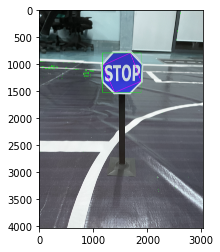

In [40]:
plt.imshow(imgContour)